<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LoanID          5000 non-null   object 
 1   Age             5000 non-null   int64  
 2   Income          5000 non-null   int64  
 3   LoanAmount      5000 non-null   int64  
 4   CreditScore     5000 non-null   int64  
 5   MonthsEmployed  5000 non-null   int64  
 6   NumCreditLines  5000 non-null   int64  
 7   InterestRate    5000 non-null   float64
 8   LoanTerm        5000 non-null   int64  
 9   DTIRatio        5000 non-null   float64
 10  Education       5000 non-null   object 
 11  EmploymentType  5000 non-null   object 
 12  MaritalStatus   5000 non-null   object 
 13  HasMortgage     5000 non-null   object 
 14  HasDependents   5000 non-null   object 
 15  LoanPurpose     5000 non-null   object 
 16  HasCoSigner     5000 non-null   object 
 17  Default         5000 non-null   i

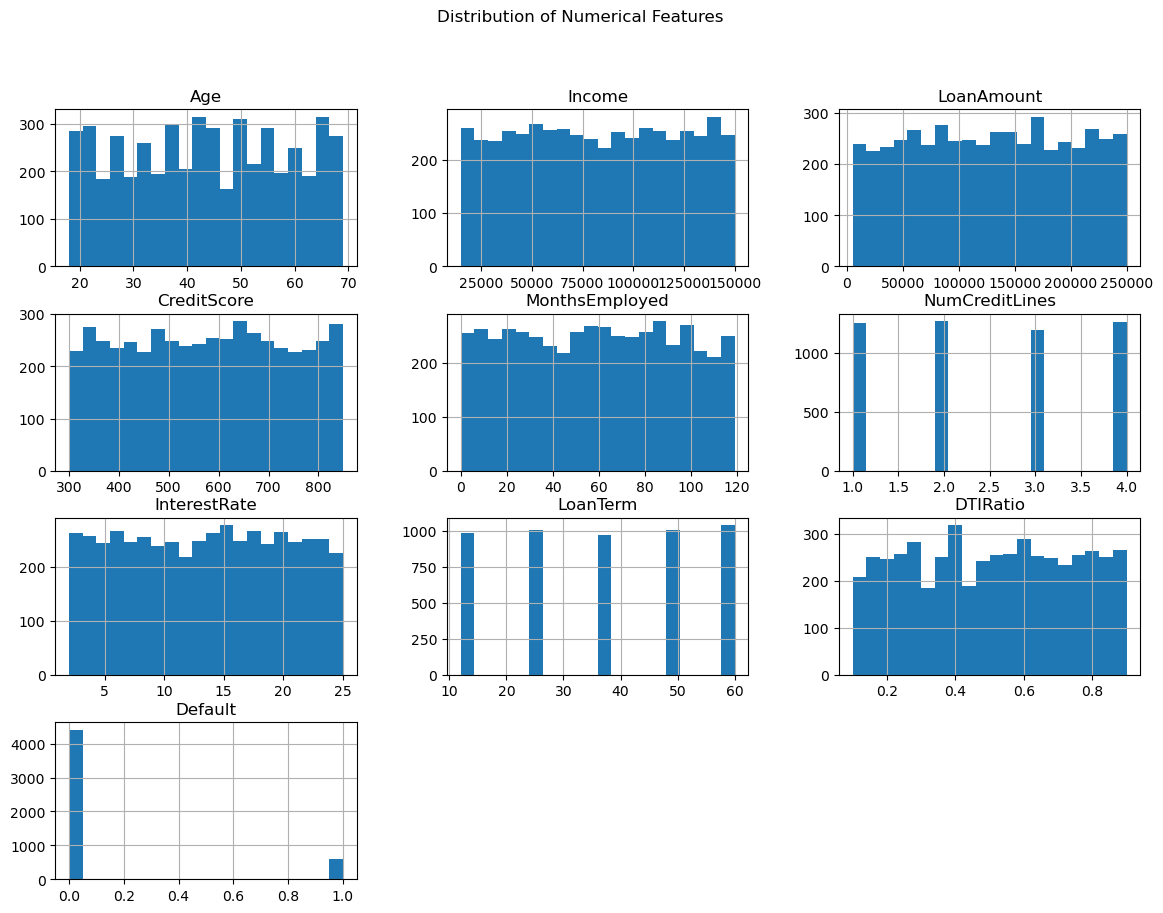

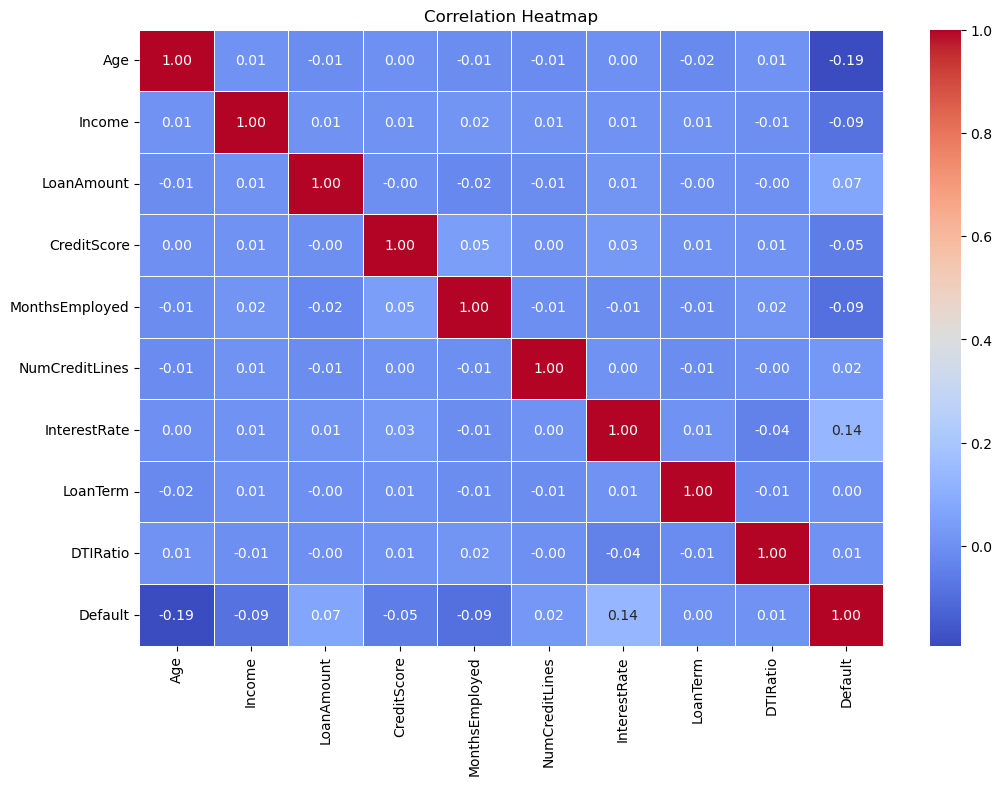

Accuracy: 0.894
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       890
           1       1.00      0.04      0.07       110

    accuracy                           0.89      1000
   macro avg       0.95      0.52      0.51      1000
weighted avg       0.91      0.89      0.85      1000

Confusion Matrix:
 [[890   0]
 [106   4]]


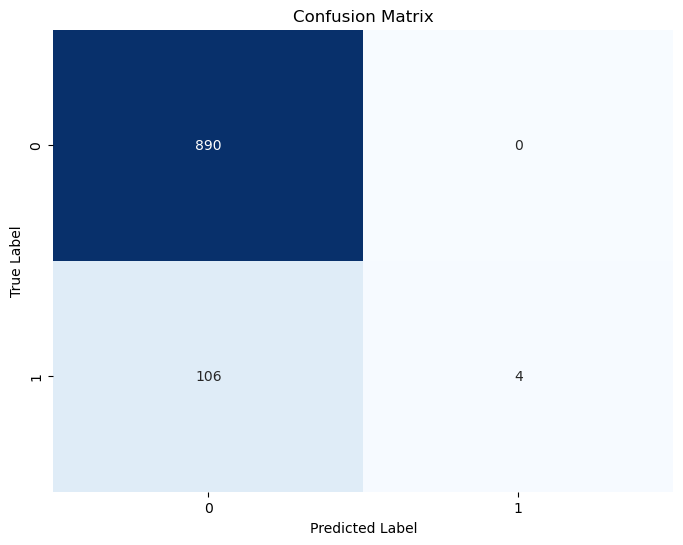

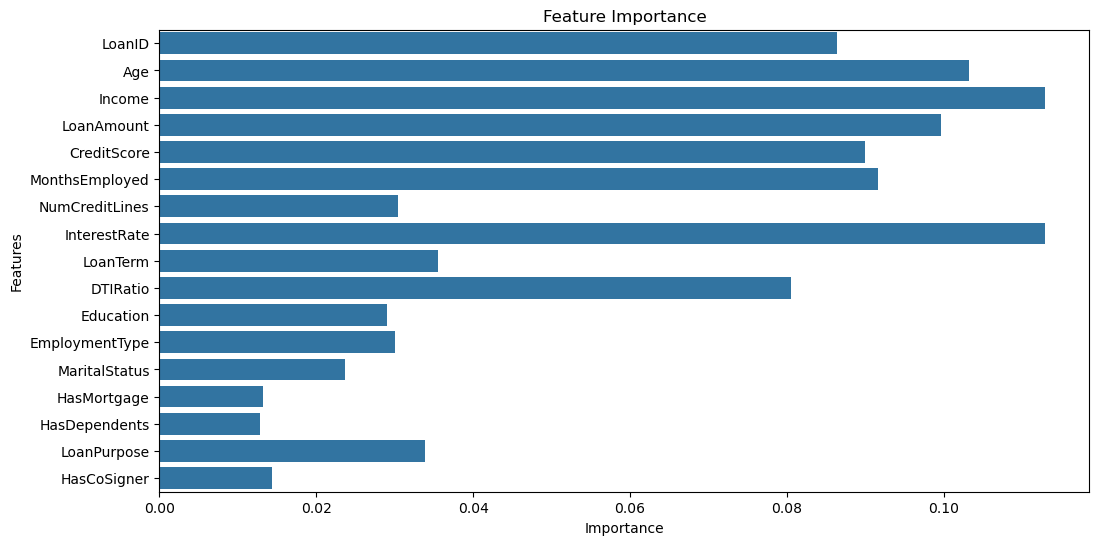

['scaler.pkl']

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Dataset
df = pd.read_csv("Loan_default.csv")  # Updated dataset name

# Exploratory Data Analysis
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Visualization: Distribution of Numerical Columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols].hist(bins=20, figsize=(14, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Visualization: Correlation Heatmap
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Data Preprocessing
# Handling missing values
df = df.dropna()

# Encoding categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Splitting data into features and target
X = df.drop("Default", axis=1)  # Target column is "Default"
y = df["Default"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Selection and Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualization: Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Visualization: Feature Importance
feature_importance = model.feature_importances_
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance, y=X.columns)
plt.title("Feature Importance")
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Save the model
import joblib
joblib.dump(model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LoanID          5000 non-null   object 
 1   Age             5000 non-null   int64  
 2   Income          5000 non-null   int64  
 3   LoanAmount      5000 non-null   int64  
 4   CreditScore     5000 non-null   int64  
 5   MonthsEmployed  5000 non-null   int64  
 6   NumCreditLines  5000 non-null   int64  
 7   InterestRate    5000 non-null   float64
 8   LoanTerm        5000 non-null   int64  
 9   DTIRatio        5000 non-null   float64
 10  Education       5000 non-null   object 
 11  EmploymentType  5000 non-null   object 
 12  MaritalStatus   5000 non-null   object 
 13  HasMortgage     5000 non-null   object 
 14  HasDependents   5000 non-null   object 
 15  LoanPurpose     5000 non-null   object 
 16  HasCoSigner     5000 non-null   object 
 17  Default         5000 non-null   i

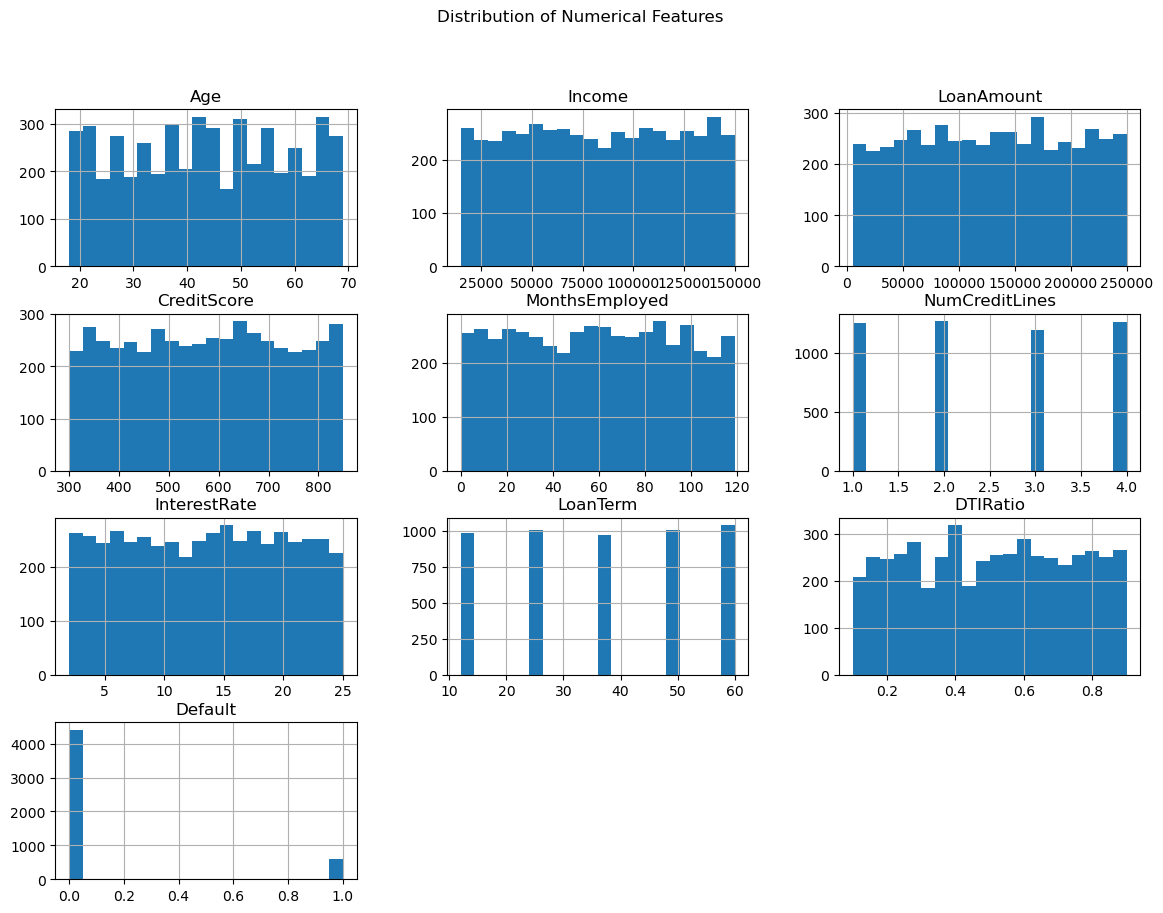

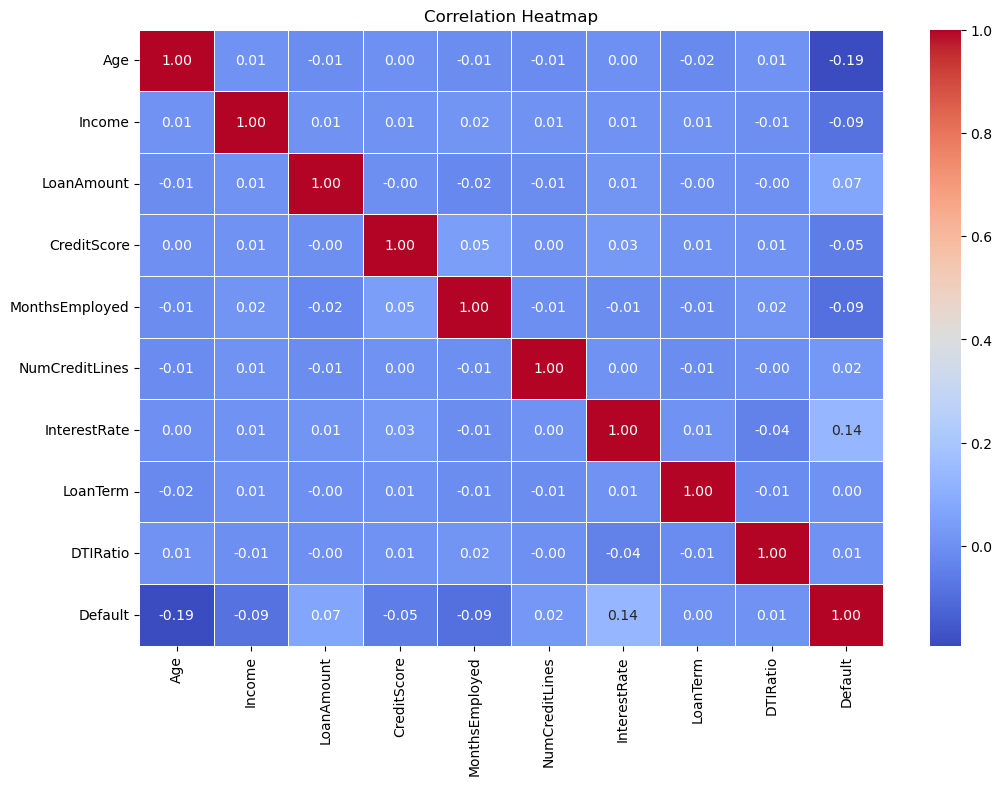

Accuracy: 0.8160
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       890
           1       1.00      0.04      0.07       110

    accuracy                           0.89      1000
   macro avg       0.95      0.52      0.51      1000
weighted avg       0.91      0.89      0.85      1000

Confusion Matrix:
 [[890   0]
 [106   4]]


C:\Users\Bezawit\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


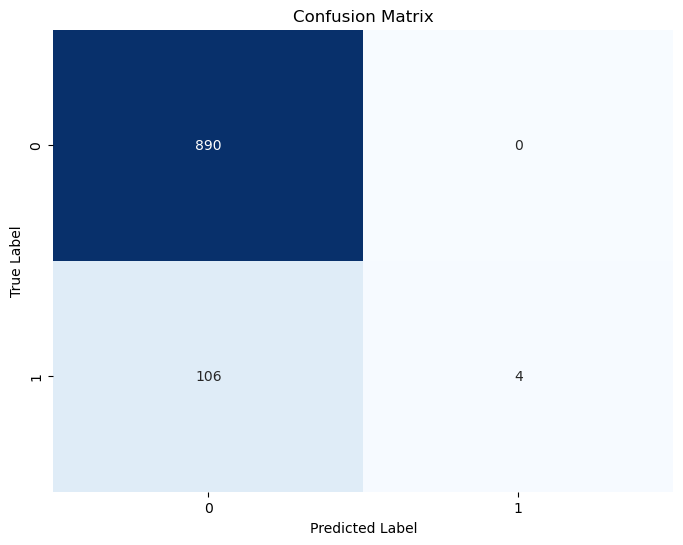

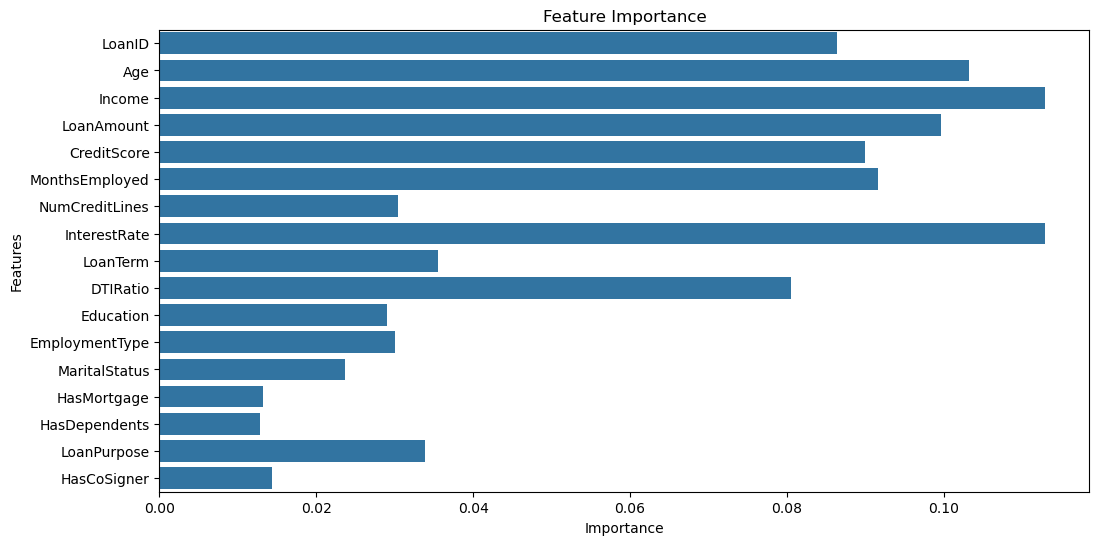

['scaler.pkl']

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Load Dataset
df = pd.read_csv("Loan_default.csv")  # Updated dataset name

# Exploratory Data Analysis
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Visualization: Distribution of Numerical Columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols].hist(bins=20, figsize=(14, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Visualization: Correlation Heatmap
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Data Preprocessing
# Handling missing values
df = df.dropna()

# Encoding categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Splitting data into features and target
X = df.drop("Default", axis=1)  # Target column is "Default"
y = df["Default"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Selection and Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Function to calculate accuracy
def calculate_accuracy(X_test, y_test, model, scaler):
    # Scale the test data using the pre-loaded scaler
    X_test_scaled = scaler.transform(X_test)
    
    # Predict using the pre-trained model
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Calculate Accuracy
accuracy = calculate_accuracy(X_test, y_test, model, scaler)
print(f"Accuracy: {accuracy:.4f}")  # Displaying accuracy with 4 decimal points

# Model Evaluation
print("Classification Report:\n", classification_report(y_test, model.predict(X_test)))
print("Confusion Matrix:\n", confusion_matrix(y_test, model.predict(X_test)))

# Visualization: Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Visualization: Feature Importance
feature_importance = model.feature_importances_
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance, y=X.columns)
plt.title("Feature Importance")
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Save the model
joblib.dump(model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")


In [24]:
from sklearn.metrics import accuracy_score

# Function to calculate accuracy
def calculate_accuracy(X_test, y_test, model, scaler):
    # Ensure that the X_test data has the same column names as the data used to train the scaler and model
    X_test = pd.DataFrame(X_test, columns=X.columns)
    
    # Scale the test data using the pre-loaded scaler
    X_test_scaled = scaler.transform(X_test)
    
    # Predict using the pre-trained model
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Calculate Accuracy
accuracy = calculate_accuracy(X_test, y_test, model, scaler)
print(f"Accuracy: {accuracy:.4f}")  # Displaying accuracy with 4 decimal points


Accuracy: 0.8160
